Logistic Regression

Decision Boundaries

Let’s use the iris dataset to illustrate Logistic Regression. This is a famous
dataset that contains the sepal and petal length and width of 150 iris flowers
of three different species: Iris setosa, Iris versicolor, and Iris virginica

Let’s try to build a classifier to detect the Iris virginica type based only on
the petal width feature. First let’s load the data:

In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn import datasets

iris = datasets.load_iris()

list(iris.keys())


['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [7]:
iris["data"]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [8]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
iris["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

0 for setosa, 1 for versicolor and 2 for virginica

In [10]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [12]:
X = iris["data"][:, 3:] # extracting petal width
y = iris["target"] == 2 # gives array of False and True
y = y.astype(np.int) # converting true false to, 1 and 0. 1 for virginica and 0 for all other

Now let’s train a Logistic Regression model

In [19]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

Let’s look at the model’s estimated probabilities for flowers with petal
widths varying from 0 cm to 3 cm

In [30]:
X_new = np.linspace(0,3,1000).reshape(-1,1) # Numpy's reshape functions allows one dimension to be -1, which means "unspecified", whose value will be inferred from the length of the array and the remaining dimensions
y_proba = log_reg.predict_proba(X_new)

In [31]:
y_proba

array([[9.99250016e-01, 7.49984089e-04],
       [9.99240201e-01, 7.59799387e-04],
       [9.99230257e-01, 7.69743043e-04],
       ...,
       [3.08374822e-03, 9.96916252e-01],
       [3.04400296e-03, 9.96955997e-01],
       [3.00476842e-03, 9.96995232e-01]])

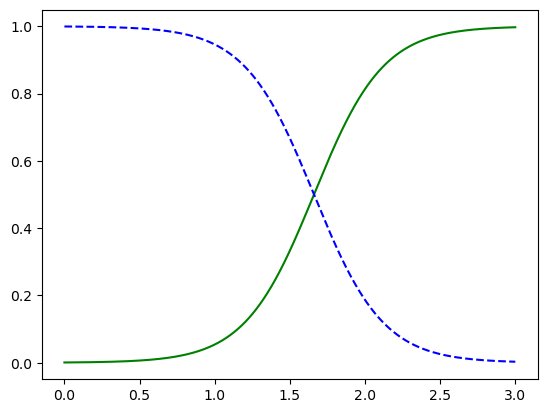

In [36]:
plt.plot(X_new, y_proba[:,1], "g-", label="Iris Virginica")
plt.plot(X_new, y_proba[:,0], "b--", label="Not Iris Virginica")
plt.show()

More fancier graph

/home/dell/anaconda3/lib/python3.10/site-packages/matplotlib/patches.py:1475: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.verts = np.dot(coords, M) + [


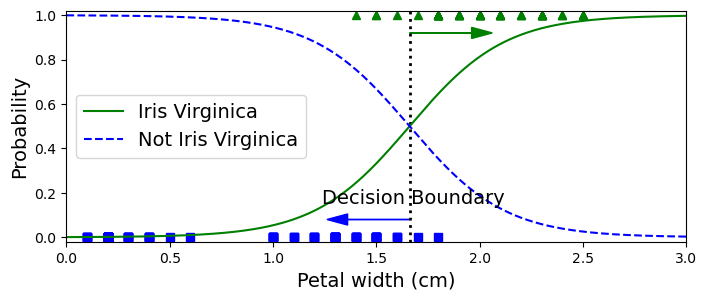

In [37]:
decision_boundary = X_new[y_proba[:,1]>=0.5][0]

plt.figure(figsize=(8,3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary,decision_boundary], [-1,2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:,1], "g-", label="Iris Virginica")
plt.plot(X_new, y_proba[:,0], "b--", label="Not Iris Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision Boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc='center left', fontsize=14)
plt.axis([0,3, -0.02, 1.02])
plt.show()

The petal width of Iris virginica flowers (represented by triangles) ranges
from 1.4 cm to 2.5 cm, while the other iris flowers (represented by squares)
generally have a smaller petal width, ranging from 0.1 cm to 1.8 cm. Notice
that there is a bit of overlap. Above about 2 cm the classifier is highly
confident that the flower is an Iris virginica (it outputs a high probability for
that class), while below 1 cm it is highly confident that it is not an Iris
virginica (high probability for the “Not Iris virginica” class). if we ask it to predict the
class (using the predict() method rather than the predict_proba()
method), it will return whichever class is the most likely. Therefore, there is
a decision boundary at around 1.6 cm where both probabilities are equal to
50%: if the petal width is higher than 1.6 cm, the classifier will predict that
the flower is an Iris virginica, and otherwise it will predict that it is not
(even if it is not very confident)

In [39]:
decision_boundary

array([1.66066066])

In [38]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

Below graph shows the same dataset, but this time displaying two features:
petal width and length. Once trained, the Logistic Regression classifier can,
based on these two features, estimate the probability that a new flower is an
Iris virginica. The dashed line represents the points where the model
estimates a 50% probability: this is the model’s decision boundary. Note thatit is a linear boundary.16 Each parallel line represents the points where the
model outputs a specific probability, from 15% (bottom left) to 90% (top
right). All the flowers beyond the top-right line have an over 90% chance of
being Iris virginica, according to the model.

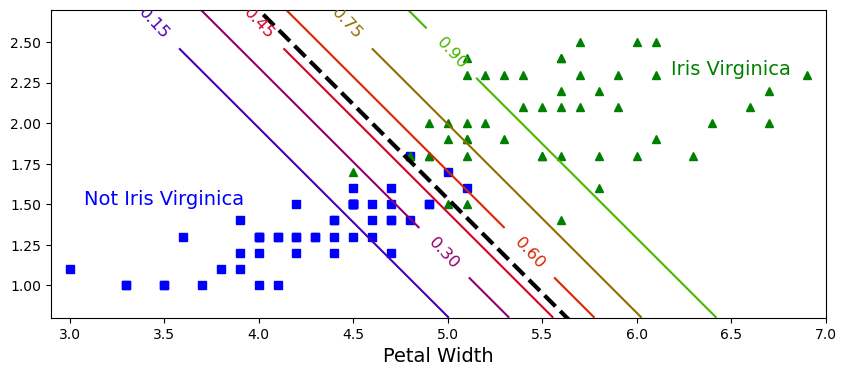

In [94]:
X = iris["data"][:,2:] # petal length and petal width
y = iris["target"] == 2 
y = y.astype(np.int64)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X,y)

x0,x1 = np.meshgrid(
    np.linspace(2.9,7,500).reshape(-1,1),
    np.linspace(0.8,2.7,200).reshape(-1,1)
)

X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10,4))
plt.plot(X[y==0,0], X[y==0,1], "bs") # X has 2 columns, one for petal length and one for petal width. y==0 will take all non virginca flowers and then from X takes 0th index which means petal length and then it is plotted against petal width (X[1])
plt.plot(X[y==1,0], X[y==1,1], "g^") # all virginica

zz = y_proba[:,1].reshape(x0.shape)
contour = plt.contour(x0,x1,zz, cmap=plt.cm.brg)
left_right = np.array([2.9,7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5,1.5, "Not Iris Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5,2.3, "Iris Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal Length", fontsize=14)
plt.xlabel("Petal Width", fontsize=14)
plt.axis([2.9,7,0.8,2.7])
plt.show()

In [91]:
log_reg.coef_

array([[2.77762524, 2.38552012]])

Just like the other linear models, Logistic Regression models can be
regularized using ℓ1 or ℓ2 penalties. Scikit-Learn actually adds an ℓ2 penalty
by default.

Softmax regression

Let’s use Softmax Regression to classify the iris flowers into all three
classes. Scikit-Learn’s LogisticRegression uses one-versus-the-rest by
default when you train it on more than two classes, but you can set the
multi_class hyperparameter to "multinomial" to switch it to SoftmaxRegression.You must also specify a solver that supports Softmax
Regression, such as the "lbfgs" solver (see Scikit-Learn’s documentation
for more details). It also applies ℓ2 regularization by default, which you can
control using the hyperparameter C

In [99]:
X = iris["data"][:,(2,3)] # petal length and petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

So the next time you find an iris with petals that are 5 cm long and 2 cm
wide, you can ask your model to tell you what type of iris it is, and it will
answer Iris virginica (class 2) with 94.2% probability (or Iris versicolor
with 5.8% probability)

In [100]:
softmax_reg.predict([[5,2]])

array([2])

In [102]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

Below graph shows the resulting decision boundaries, represented by the
background colors

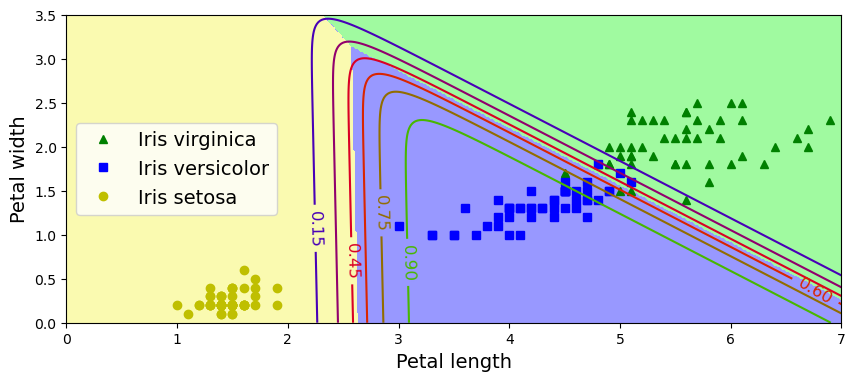

In [109]:
from matplotlib.colors import ListedColormap

x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

Notice that the decision boundaries between any two
classes are linear. The figure also shows the probabilities for the Iris
versicolor class, represented by the curved lines (e.g., the line labeled with
0.450 represents the 45% probability boundary). Notice that the model can
predict a class that has an estimated probability below 50%. For example, at
the point where all decision boundaries meet, all classes have an equal
estimated probability of 33%